In [1]:
import torch
import torchvision.datasets
import torchvision.transforms


In [48]:
dataset = torchvision.datasets.FER2013('/home/da23c014/PrivacyAI/CourseProject/datasets', split='train',transform=transform)

RuntimeError: train.csv not found in /home/da23c014/PrivacyAI/CourseProject/datasets/fer2013 or corrupted. You can download it from https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [9]:
transform = torchvision.transforms.ToTensor()
dataset = torchvision.datasets.FER2013('/home/da23c014/PrivacyAI/CourseProject/datasets', split='train',transform=transform)

In [38]:
k=torch.utils.data.DataLoader(dataset, 100,shuffle=True)

In [54]:
def create_labels(y0):
    labels_dict = {0: -1, 1: -1, 2: 0, 3: 1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1}
    y0 = torch.stack([torch.tensor(labels_dict[int(cur_y)]) for cur_y in y0])
    return y0


def get_balanced_data( data_loader, data_amount):
    print('BALANCING DATASET...')
    # get balanced data
    data_amount_per_class = data_amount // 2

    labels_counter = {1: 0, 0: 0}
    x0, y0 = [], []
    got_enough = False
    for bx, by in data_loader:
        by = create_labels(by)
        for i in range(len(bx)):
            if int(by[i])==-1:
                continue
            elif labels_counter[int(by[i])] < data_amount_per_class:
                labels_counter[int(by[i])] += 1
                x0.append(bx[i])
                y0.append(by[i])
            if (labels_counter[0] >= data_amount_per_class) and (labels_counter[1] >= data_amount_per_class):
                got_enough = True
                break
        if got_enough:
            break
    x0, y0 = torch.stack(x0), torch.stack(y0)
    return x0, y0

In [55]:
x0, y0 = get_balanced_data(k, 500)

BALANCING DATASET...


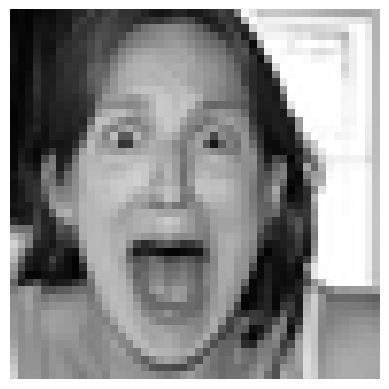

In [60]:
import matplotlib.pyplot as plt
import torch

# Assuming x0 is your tensor with shape [500, 1, 48, 48]
# Extract the first image

image_tensor = x0[(y0==0)][56] # Shape will be [1, 48, 48]

# Remove the channel dimension (1), changing shape to [48, 48]
image_tensor = image_tensor.squeeze(0)

# Convert the tensor to a numpy array
image_np = image_tensor.numpy()

# Display the image
plt.imshow(image_np, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = '/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013/train.csv'
df = pd.read_csv(data_path)

# Stratified split on the 'emotion' column
train_df, test_df = train_test_split(df, test_size=0.35, stratify=df['emotion'], random_state=42)

# Save the split datasets
train_df.to_csv('/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013/train.csv', index=False)
test_df.to_csv('/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013/test.csv', index=False)

print("Data has been split into train and test sets with stratification on 'emotion' label.")


Data has been split into train and test sets with stratification on 'emotion' label.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = '/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013/train.csv'
df = pd.read_csv(data_path)

In [2]:
df.emotion.value_counts()

emotion
3    4690
6    3227
4    3139
2    2663
0    2597
5    2061
1     283
Name: count, dtype: int64

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = '/home/da23c014/PrivacyAI/CourseProject/datasets/fer2013/test.csv'
df = pd.read_csv(data_path)

In [4]:
df.emotion.value_counts()

emotion
3    2525
6    1738
4    1691
2    1434
0    1398
5    1110
1     153
Name: count, dtype: int64